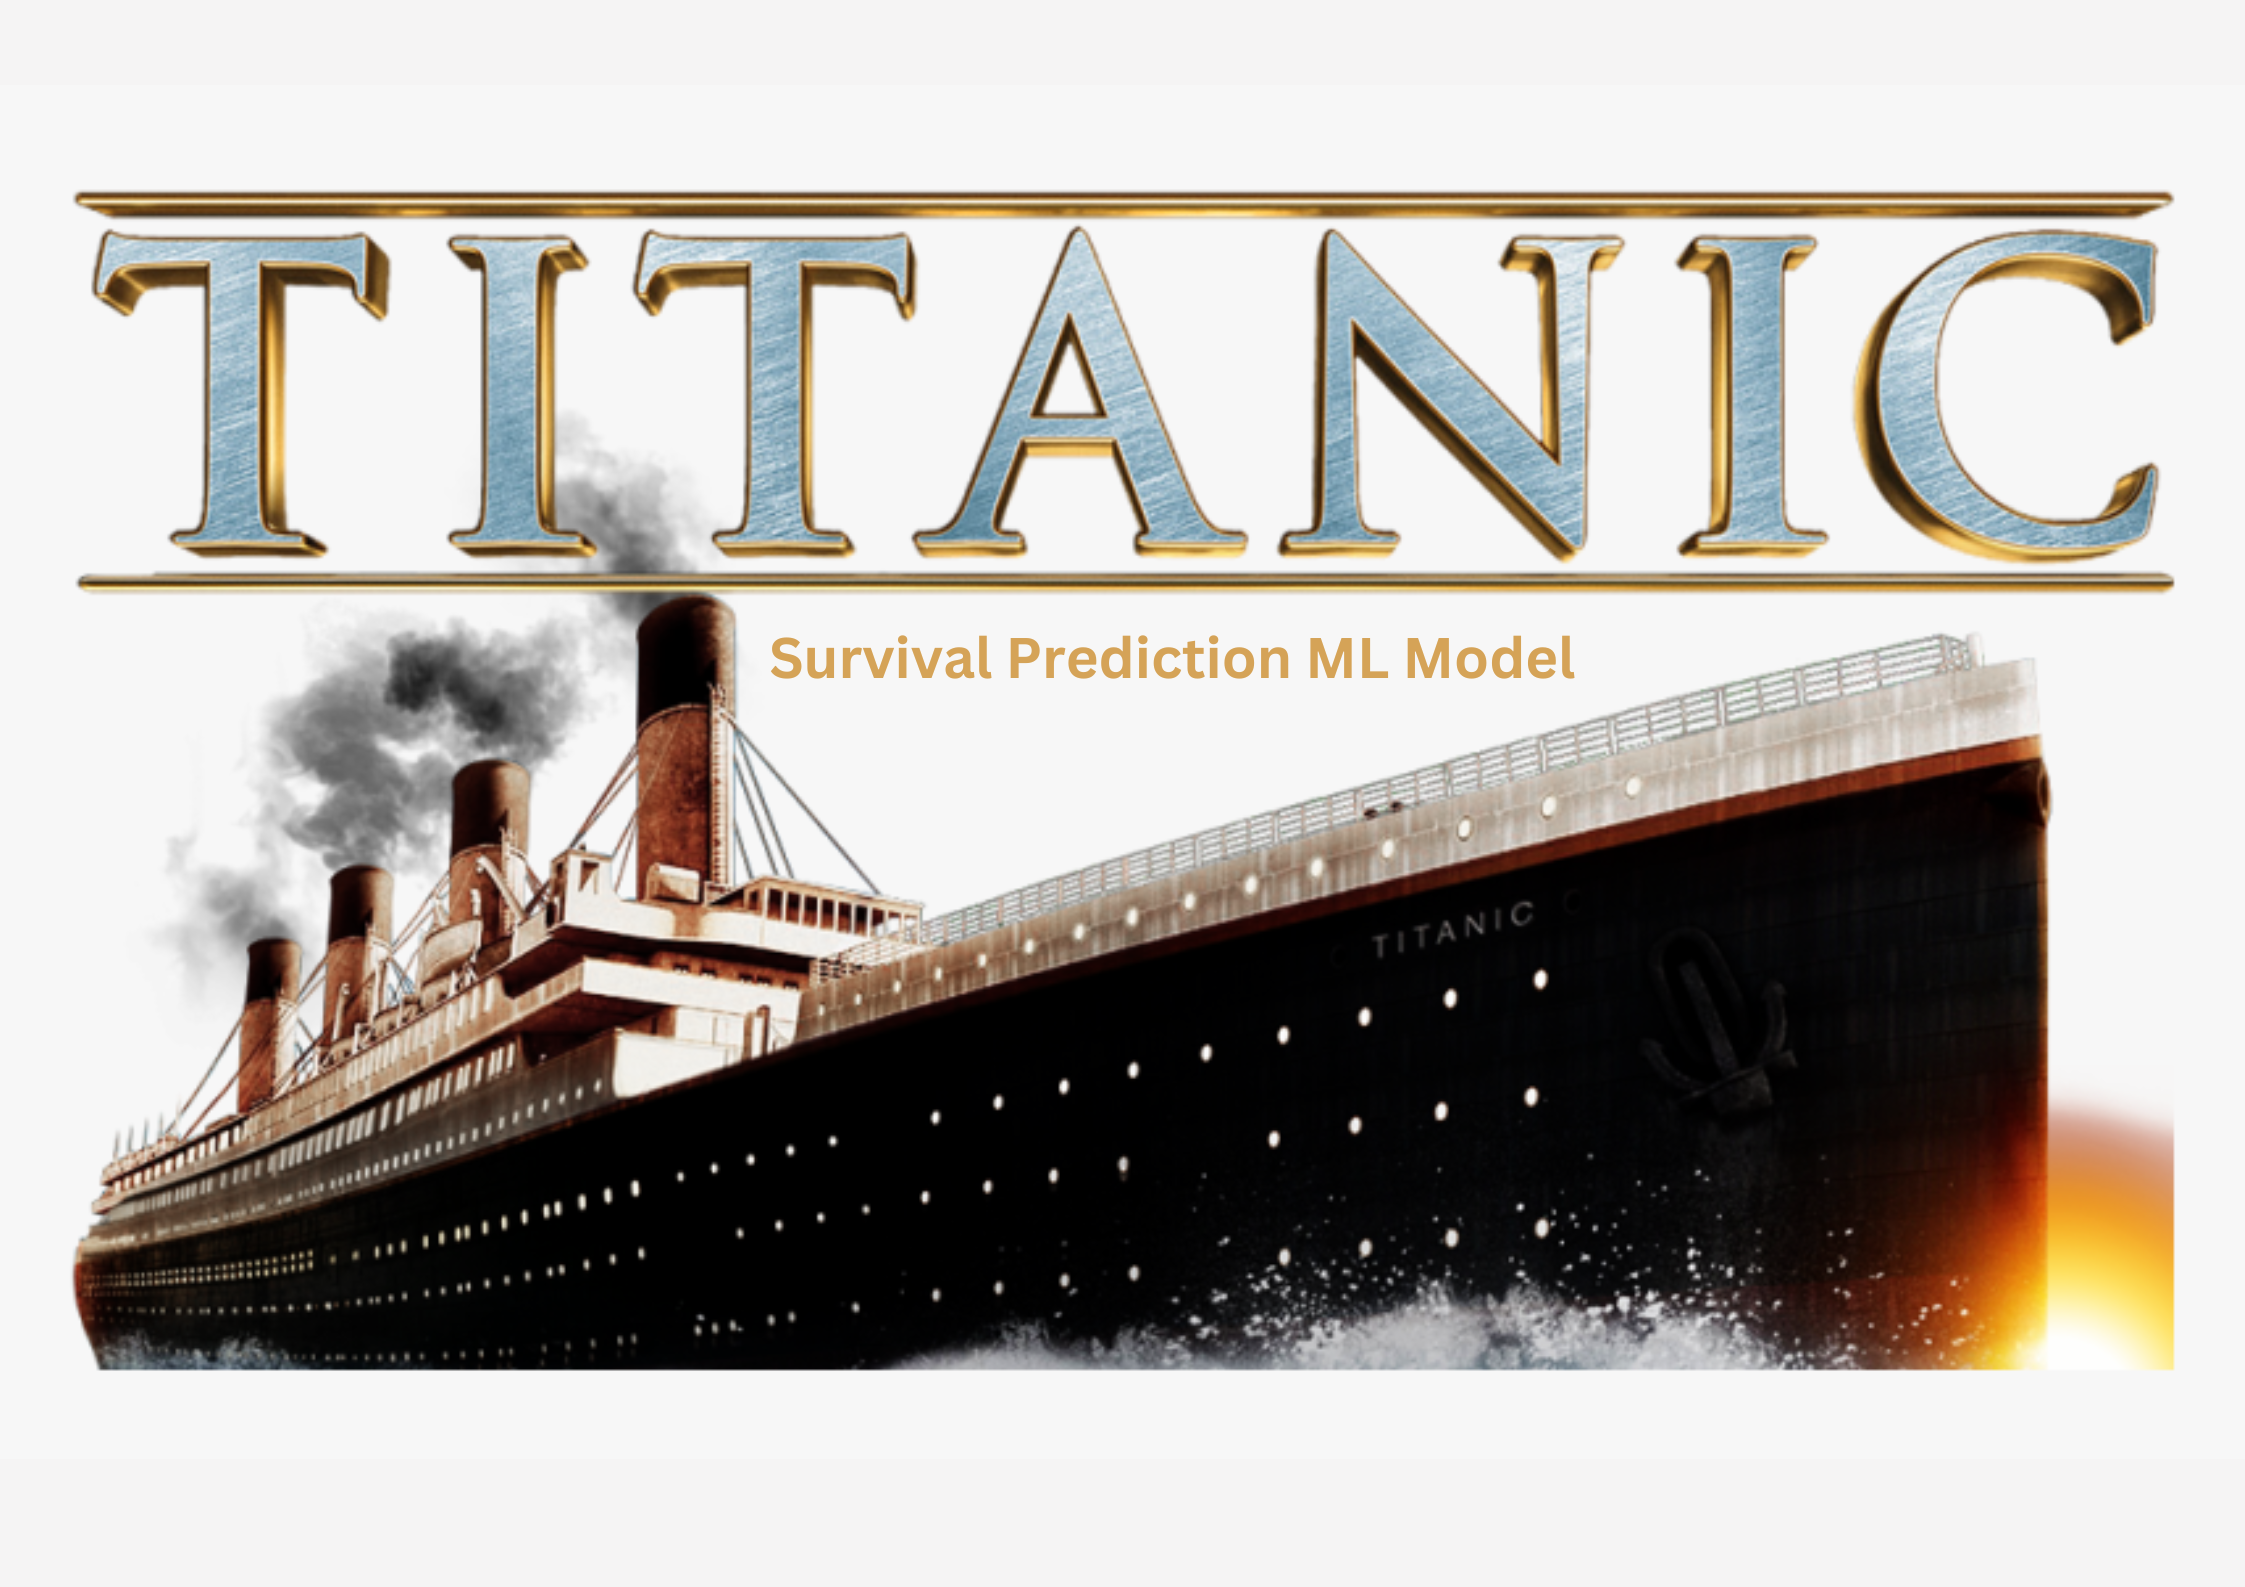

## Import DataSet with Rquirments Libarary's

In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")
import pickle

In [2]:
t_data = pd.read_csv('train.csv')

In [3]:
t_data.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
300,301,1,3,"Kelly, Miss. Anna Katherine ""Annie Kate""",female,NaN,0,0,9234,7.750,NaN,Q
842,843,1,1,"Serepeca, Miss. Augusta",female,30.0,0,0,113798,31.000,NaN,C
813,814,0,3,"Andersson, Miss. Ebba Iris Alfrida",female,6.0,4,2,347082,31.275,NaN,S
475,476,0,1,"Clifford, Mr. George Quincy",male,NaN,0,0,110465,52.000,A14,S
236,237,0,2,"Hold, Mr. Stephen",male,44.0,1,0,26707,26.000,NaN,S


In [4]:
t_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
t_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
# Handleing Missing Values
# Age : 177 & Cabin:687
      
t_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
t_data['Age'].value_counts()

24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: Age, Length: 88, dtype: int64

In [8]:
t_data['Cabin'].value_counts()

B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64

### We have drop the Cabin column and fill blank value in age column with Mean of Age.

In [9]:
t_data = t_data.drop(columns='Cabin', axis=1)

In [10]:
# Drop Cabin column
t_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [11]:
t_data['Age'].fillna(t_data['Age'].mean(), inplace=True)

In [12]:
# Fill blank value with Mean (29.699117647058763) fo Age.

t_data.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,29.699118,8,2,CA. 2343,69.5500,S
396,397,0,3,"Olsson, Miss. Elina",female,31.000000,0,0,350407,7.8542,S
452,453,0,1,"Foreman, Mr. Benjamin Laventall",male,30.000000,0,0,113051,27.7500,C
585,586,1,1,"Taussig, Miss. Ruth",female,18.000000,0,2,110413,79.6500,S
54,55,0,1,"Ostby, Mr. Engelhart Cornelius",male,65.000000,0,1,113509,61.9792,C


In [13]:
# Finding the mode value of "Embarked" column

print(t_data['Embarked'].mode())

0    S
dtype: object


In [14]:
print(t_data['Embarked'].mode()[0])

S


### Replacing the missing values(2) in "Embarked" column with mode value. It means all missing value replace with "South Hampton Station". It's denoted by "S"

In [15]:
t_data['Embarked'].fillna(t_data['Embarked'].mode()[0], inplace=True)

In [16]:
t_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

### Finding the number of people Survived and Survived
### Survived : 549
### Not Survived : 342

In [17]:
t_data['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [18]:
sns.set()

Text(0.5, 1.0, 'Survived Count')

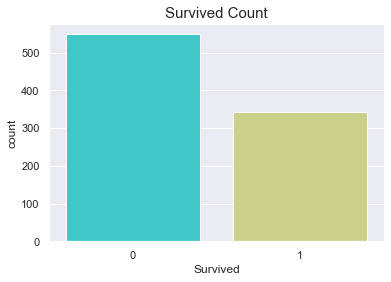

In [19]:
# Making a count plot for "Survived" column
sns.set_theme(style="darkgrid")
sns.countplot('Survived', data=t_data)
sns.countplot('Survived', data=t_data,palette="rainbow").set_title('Survived Count',size="15")

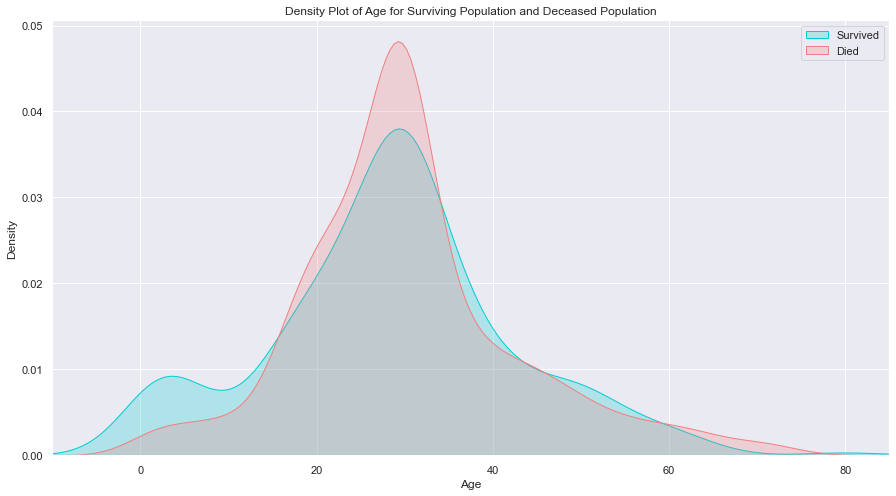

In [20]:
plt.figure(figsize=(15,8))
ax = sns.kdeplot(t_data["Age"][t_data.Survived == 1], color="darkturquoise", shade=True)
sns.kdeplot(t_data["Age"][t_data.Survived == 0], color="lightcoral", shade=True)
plt.legend(['Survived', 'Died'])
plt.title('Density Plot of Age for Surviving Population and Deceased Population')
ax.set(xlabel='Age')
plt.xlim(-10,85)
plt.show()

### HeatMap Corr.

<AxesSubplot:>

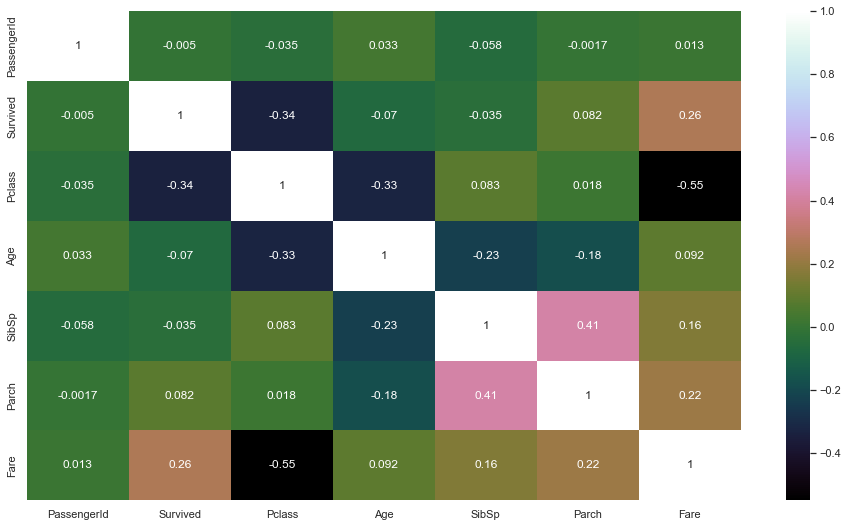

In [21]:
plt.figure(figsize=(16,9))
sns.heatmap(t_data.corr(),annot=True,cmap="cubehelix")

### Gender count : Male-577 & Female-314


In [22]:
t_data['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

Text(0.5, 1.0, 'Survived Count with Sex')

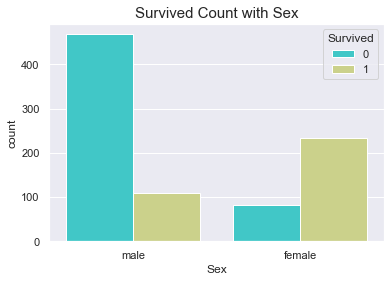

In [23]:
# Making a count plot for "Sex" column
sns.set_theme(style="darkgrid")
sns.countplot('Sex', data=t_data,hue="Survived",palette="rainbow").set_title('Survived Count with Sex',size="15")

Text(0.5, 1.0, 'Pclass Count')

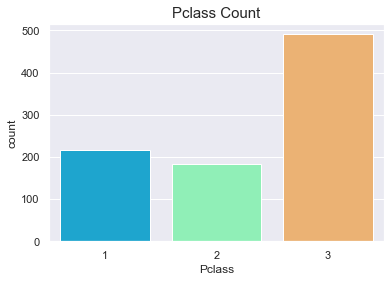

In [24]:
# Making a count plot for "P-Class" column
sns.set_theme(style="darkgrid")
sns.countplot('Pclass', data=t_data,palette="rainbow").set_title('Pclass Count',size="15")

Text(0.5, 1.0, 'Survived Count with Sex')

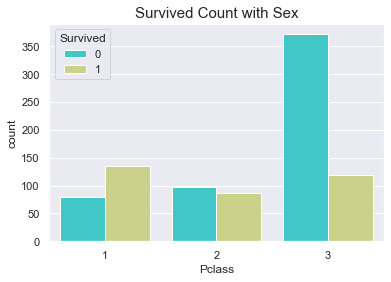

In [25]:
# Making a count plot for "Pclass count with Sex" column
sns.set_theme(style="darkgrid")
sns.countplot('Pclass', data=t_data,hue="Survived",palette="rainbow").set_title('Survived Count with Sex',size="15")

### Survivel PairPlot

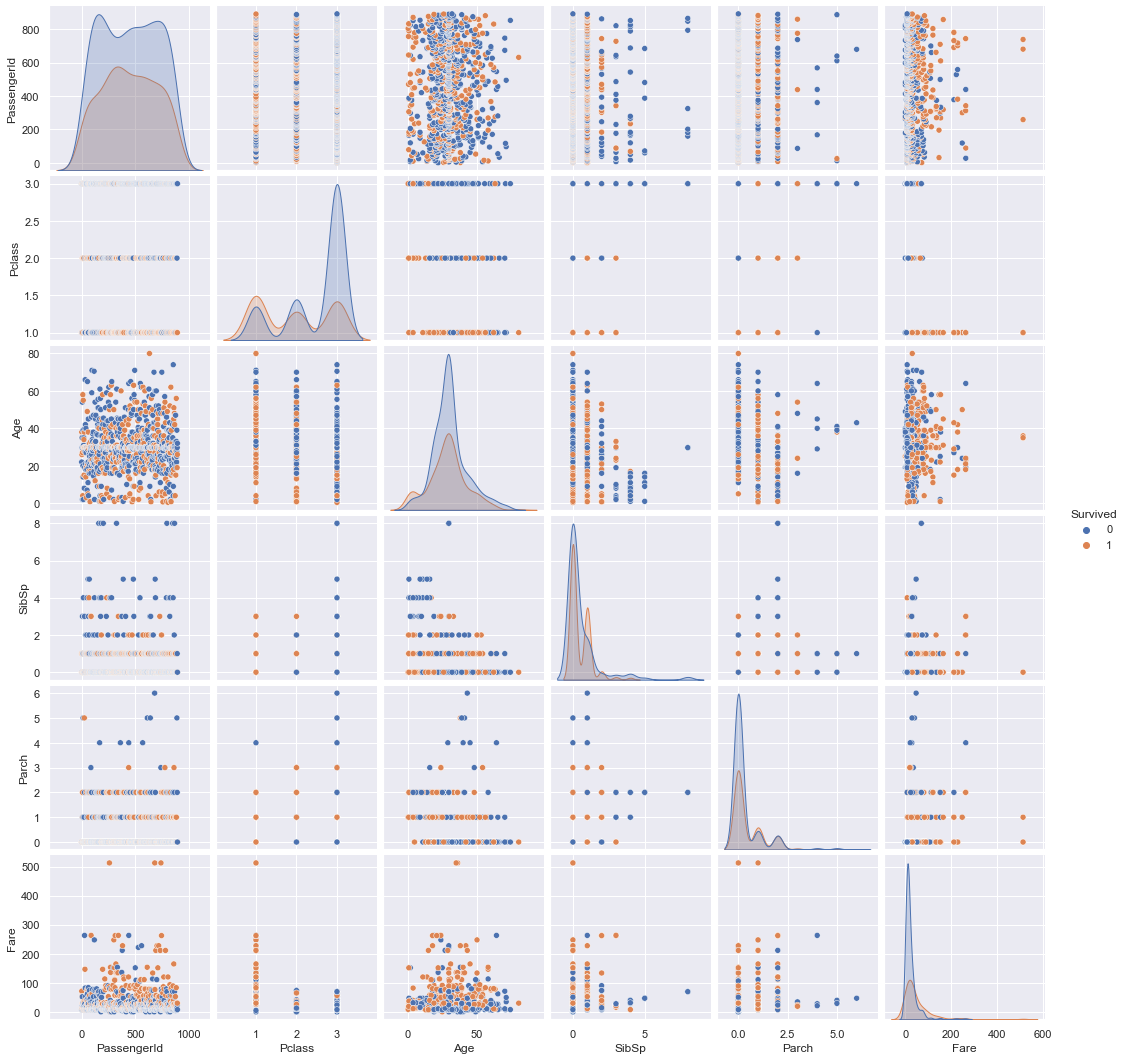

In [26]:
sns.pairplot(data=t_data,hue='Survived')

### Age Distribution

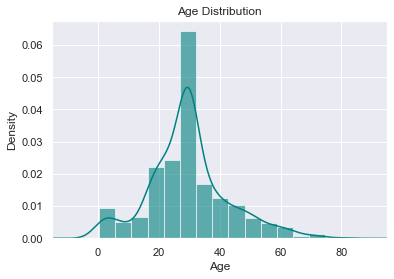

In [27]:
t_data["Age"].hist(bins=15, density=True, stacked=True, color='teal', alpha=0.6)
t_data["Age"].plot(kind='density', color='teal',title='Age Distribution').set(xlabel='Age')
plt.xlim(-15,95)
plt.show()

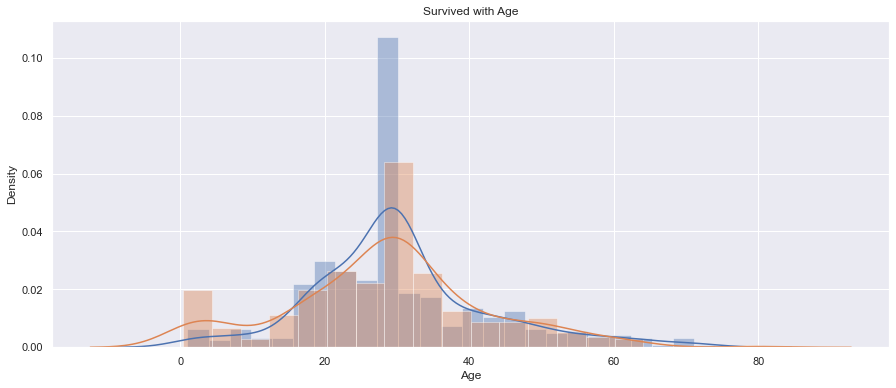

In [28]:
plt.figure(figsize=(15,6))
plt.title("Survived with Age")
sns.distplot(t_data[t_data['Survived']==0]['Age'])
sns.distplot(t_data[t_data['Survived']==1]['Age'])
plt.show()

### Fare

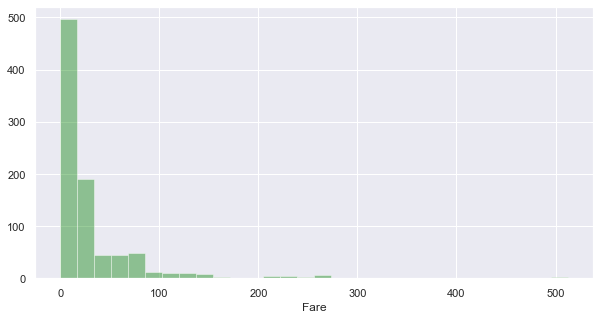

In [29]:
plt.figure(figsize=(10,5))
sns.set_theme()
sns.distplot(t_data['Fare'],bins=30 ,kde=False,color='green')
plt.show()

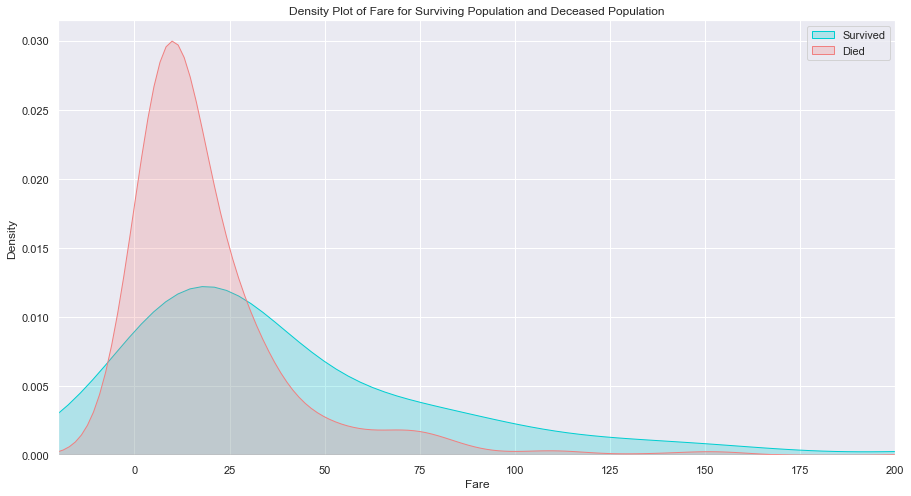

In [30]:
plt.figure(figsize=(15,8))
ax = sns.kdeplot(t_data["Fare"][t_data.Survived == 1], color="darkturquoise", shade=True)
sns.kdeplot(t_data["Fare"][t_data.Survived == 0], color="lightcoral", shade=True)
plt.legend(['Survived', 'Died'])
plt.title('Density Plot of Fare for Surviving Population and Deceased Population')
ax.set(xlabel='Fare')
plt.xlim(-20,200)
plt.show()

### Age with Fare Joinplot 

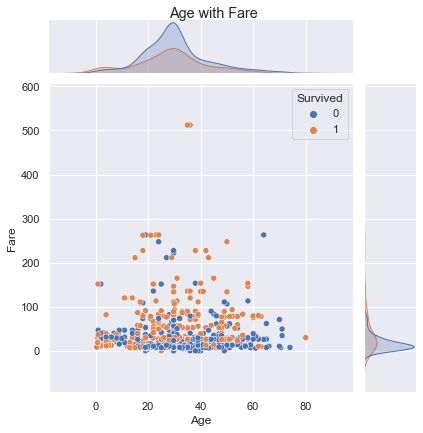

In [31]:
sns.jointplot(data=t_data,x='Age',y='Fare',hue='Survived')
plt.suptitle('Age with Fare', y = 1)
plt.show()

### SibSp

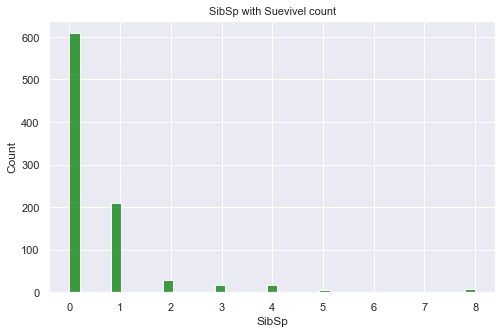

In [32]:
plt.figure(figsize=(8,5))
plt.title('SibSp with Suevivel count', y = 1,size="11")
sns.histplot(t_data['SibSp'],color='green')
plt.show()

### Embarked

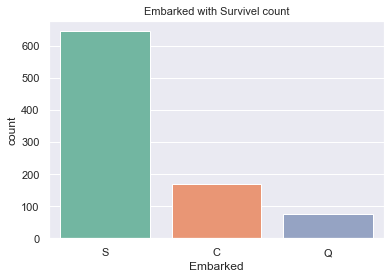

In [33]:
plt.title('Embarked with Survivel count', y = 1,size="11")
sns.countplot(x='Embarked', data=t_data, palette='Set2')
plt.show()

### Now Encoding tha Catagories Columns || Sex & Embarked

In [34]:
t_data['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [35]:
t_data['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

# Converting categorical columns in Encoding

### Here Sex column : Male=0 & Female=1

### Here Embarked column : S=0, C=1, Q=2
     

In [36]:
t_data.replace({'Sex':{'male':0,'female':1}, 'Embarked':{'S':0,'C':1,'Q':2}}, inplace=True)

In [37]:
t_data.sample(8)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
250,251,0,3,"Reed, Mr. James George",0,29.699118,0,0,362316,7.2500,0
452,453,0,1,"Foreman, Mr. Benjamin Laventall",0,30.000000,0,0,113051,27.7500,1
467,468,0,1,"Smart, Mr. John Montgomery",0,56.000000,0,0,113792,26.5500,0
738,739,0,3,"Ivanoff, Mr. Kanio",0,29.699118,0,0,349201,7.8958,0
443,444,1,2,"Reynaldo, Ms. Encarnacion",1,28.000000,0,0,230434,13.0000,0
773,774,0,3,"Elias, Mr. Dibo",0,29.699118,0,0,2674,7.2250,1
320,321,0,3,"Dennis, Mr. Samuel",0,22.000000,0,0,A/5 21172,7.2500,0
152,153,0,3,"Meo, Mr. Alfonzo",0,55.500000,0,0,A.5. 11206,8.0500,0


### Now Separating feture target 

In [38]:
A = t_data.drop(columns = ['PassengerId','Name','Ticket','Survived'],axis=1)
B = t_data['Survived']

In [39]:
A.sample(5)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
805,3,0,31.0,0,0,7.7750,0
625,1,0,61.0,0,0,32.3208,0
840,3,0,20.0,0,0,7.9250,0
681,1,0,27.0,0,0,76.7292,1
312,2,1,26.0,1,1,26.0000,0


In [40]:
B.sample(5)

800    0
597    0
848    0
515    0
731    0
Name: Survived, dtype: int64

### Now Spliting data into Train-Test 

In [41]:
A_train, A_test, B_train, B_test = train_test_split(A,B, test_size=0.2, random_state=2)

In [42]:
print(A.shape, A_train.shape, A_test.shape)

(891, 7) (712, 7) (179, 7)


In [43]:
print(B.shape, B_train.shape, B_test.shape)

(891,) (712,) (179,)


In [44]:
from sklearn import preprocessing

In [48]:
model = LogisticRegression()

In [49]:
# training the Logistic Regression model with training data

model.fit(A_train, B_train)

LogisticRegression()

### Accuracy on training data 80%

In [50]:
A_train_prediction = model.predict(A_train)

In [51]:
print(A_train_prediction)

[0 1 0 0 0 0 0 1 0 0 0 1 0 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0 1 0 1 1 0 0 1 0 1
 0 0 0 0 0 0 1 1 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 1 0 0 1 1 0 0 1 1 0 1 0 0 1
 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0 1 0 0 0 1 1 1 0 1 0 0 0 0 0 1 0 0 0
 1 1 0 0 1 0 0 1 0 0 1 0 0 1 0 1 0 1 0 1 0 1 1 1 1 1 1 0 0 1 1 1 0 0 1 0 0
 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 1 0 1 1 1
 0 0 0 1 0 0 0 1 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0 1 1 0 1 1 1 1 0 0 0 0 0 0 0
 0 1 0 0 1 1 1 0 0 1 0 1 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 1 0 0 0
 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 1 0 1 1 0 0 0 0 1 0 1 0 0 1 0 0 0 1 0 0 0
 0 1 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 1 1 0 0 0 1 0 1 0 0 0 0 0 0 1 1 0 1 1
 0 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 0 1 0 0 0 0 1 1 0 0 0 1 0 1 1 1 0 0
 0 0 1 0 0 0 1 1 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 1 1 1 0 1 1 0 0 0
 0 1 0 1 0 0 1 1 0 0 0 0 1 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0 1 0 0 0 0 1 1 0 0
 1 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 1 1 0 1 0 0 1 0 0 0 1 1 0 1 0
 0 0 0 0 1 0 0 1 0 1 1 0 

In [52]:
training_data_accuracy = accuracy_score(B_train, A_train_prediction)
print('Accuracy score of training data : ', training_data_accuracy)

Accuracy score of training data :  0.8075842696629213


### Accuracy on testing data 78% Not bad!

In [53]:
A_test_prediction = model.predict(A_test)

In [54]:
print(A_test_prediction)

[0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 1 0 1 1 0 1 0 1 1 0 0 0 0 0 0 0 0 1 1
 0 0 0 0 0 1 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 1 0 1 0
 1 0 0 0 1 0 1 0 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 1 0 0 1 0 1 1 0 1 1 0 0 0 0
 0 0 0 1 1 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 1 1 1 1 0 1 0 0
 0 1 0 0 0 0 1 0 0 1 1 0 1 0 0 0 1 1 0 0 1 0 0 1 1 1 0 0 0 0 0]


In [55]:
test_data_accuracy = accuracy_score(B_test, A_test_prediction)
print('Accuracy score of test data : ', test_data_accuracy)

Accuracy score of test data :  0.7821229050279329
